# DIAGNOSING BREAST CANCER WITH THE KNN ALGORITHM


Rosa Karina Torres Calderon

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1- Reading the data set

In [2]:
wdbc = pd.read_csv("wisc_bc_data.csv")
print(wdbc.head(5))
print(" ")
print('Tamaño del data set: ' + str(wdbc.shape))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

# Step 2- Exploring and preparing the data

In [3]:
wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
# Remove ID feature
print('Tamaño del data set original: ' + str(wdbc.shape))

wdbc = wdbc.drop(wdbc.columns[0], axis = 1)  
print('Tamaño del data set modificado: ' + str(wdbc.shape))

Tamaño del data set original: (569, 32)
Tamaño del data set modificado: (569, 31)


In [5]:
# Output how many masses are benign and how many are malignant
print("Numero de masas malignas y benignas: ")
print(wdbc["diagnosis"].value_counts()) 

Numero de masas malignas y benignas: 
B    357
M    212
Name: diagnosis, dtype: int64


In [6]:
# Change name of classes
wdbc["diagnosis"] = wdbc["diagnosis"].map({"B": "Beningn", "M":"Malignant"}) # Change B->Beningn and M->Malignant
wdbc["diagnosis"] = wdbc.diagnosis.astype("category")
print(wdbc["diagnosis"].head(5))

0    Malignant
1    Malignant
2    Malignant
3    Malignant
4    Malignant
Name: diagnosis, dtype: category
Categories (2, object): [Beningn, Malignant]


In [7]:
# Get percentage of benign and malign masses
percent = wdbc["diagnosis"].value_counts(); 
benign = (percent[0]*100)/(percent[0]+percent[1])
malign = (percent[1]*100)/(percent[0]+percent[1])
print("Porcentaje tumores benignos: " + str(benign) + ' %')
print("Porcentaje tumores malignos: " + str(malign) + ' %')

Porcentaje tumores benignos: 62.74165202108963 %
Porcentaje tumores malignos: 37.25834797891037 %


In [8]:
print("\nResumen estadistico de las carateristicas :")
print(" ")
print(wdbc.describe())


Resumen estadistico de las carateristicas :
 
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380   

Transformation - Normalizing numeric data

In [9]:
# Min max scaler
min_max_scaler = preprocessing.MinMaxScaler()
xminmax = min_max_scaler.fit_transform(wdbc.iloc[:,1:])
normwdbc = pd.DataFrame(xminmax)
print(normwdbc.head(5))

         0         1         2         3         4         5         6   \
0  0.521037  0.022658  0.545989  0.363733  0.593753  0.792037  0.703140   
1  0.643144  0.272574  0.615783  0.501591  0.289880  0.181768  0.203608   
2  0.601496  0.390260  0.595743  0.449417  0.514309  0.431017  0.462512   
3  0.210090  0.360839  0.233501  0.102906  0.811321  0.811361  0.565604   
4  0.629893  0.156578  0.630986  0.489290  0.430351  0.347893  0.463918   

         7         8         9   ...        20        21        22        23  \
0  0.731113  0.686364  0.605518  ...  0.620776  0.141525  0.668310  0.450698   
1  0.348757  0.379798  0.141323  ...  0.606901  0.303571  0.539818  0.435214   
2  0.635686  0.509596  0.211247  ...  0.556386  0.360075  0.508442  0.374508   
3  0.522863  0.776263  1.000000  ...  0.248310  0.385928  0.241347  0.094008   
4  0.518390  0.378283  0.186816  ...  0.519744  0.123934  0.506948  0.341575   

         24        25        26        27        28        29  
0  0

Data preparation - creating training and test datasets

In [10]:
# Split dataset in 80% train 20% test
y = wdbc.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(normwdbc,y,test_size=0.20,random_state=42) 

# Step 3- Training a Model on the data

In [11]:
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

# Step 4- Evaluating model performance

In [12]:
# Evaluating the model in the train set 
y_pred = classifier.predict(X_train)
print('Matriz de confusión')
print(pd.crosstab(y_train,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))
print("----------------------------------------------------- ")
print('Metricas de clasificación')
print(classification_report(y_train,y_pred))

Matriz de confusión
Predicted  Beningn  Malignant  All
True                              
Beningn        285          1  286
Malignant       16        153  169
All            301        154  455
----------------------------------------------------- 
Metricas de clasificación
              precision    recall  f1-score   support

     Beningn       0.95      1.00      0.97       286
   Malignant       0.99      0.91      0.95       169

   micro avg       0.96      0.96      0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455



In [13]:
# Evaluating the model in the test set 
y_pred = classifier.predict(X_test)
print('Matriz de confusión')
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))
print("----------------------------------------------------- ")
print('Metricas de clasificación')
print(classification_report(y_test,y_pred))

Matriz de confusión
Predicted  Beningn  Malignant  All
True                              
Beningn         69          2   71
Malignant        3         40   43
All             72         42  114
----------------------------------------------------- 
Metricas de clasificación
              precision    recall  f1-score   support

     Beningn       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Step 5- Improving model performance

Transformation z-score standardization

In [14]:
#Z-Standardization
std_scaler = preprocessing.StandardScaler()
stdscaler = std_scaler.fit_transform(wdbc.iloc[:,1:])
stdwdbc = pd.DataFrame(stdscaler)
print(stdwdbc.head(5))

         0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9   ...        20        21        22        23  \
0  2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601  2.001237   
1  0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126  1.890489   
2  2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475  1.456285   
3  1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939 -0.550021   
4  1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539  1.220724   

         24        25        26        27        28        29  
0  1

In [15]:
# Split new dataset in 80% train 20% test
y = wdbc.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(stdwdbc,y,test_size=0.20,random_state=42) 
#Creation of the model
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train,y_train)
#Evaluating the model
y_pred = classifier.predict(X_test)
print('Matriz de confusión')
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))
print("----------------------------------------------------- ")
print('Metricas de clasificación')
print(classification_report(y_test,y_pred))

Matriz de confusión
Predicted  Beningn  Malignant  All
True                              
Beningn         69          2   71
Malignant        2         41   43
All             71         43  114
----------------------------------------------------- 
Metricas de clasificación
              precision    recall  f1-score   support

     Beningn       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Testing alternative values of k

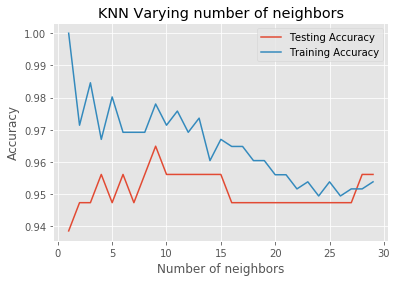

In [16]:
#Accuracies for different values of k
#Set up arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors= k)
    #Fit the model
    knn.fit(X_train,y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test,y_test)

#Generate plot
%matplotlib inline
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors,test_accuracy,label = 'Testing Accuracy')
plt.plot(neighbors,train_accuracy,label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Text(0.5, 1.0, 'Error Rate K value')

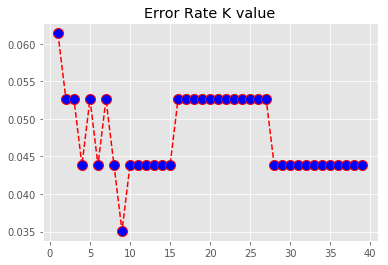

In [17]:
#Error
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
%matplotlib inline
plt.plot(range(1,40),error,color = 'red',linestyle = 'dashed', marker = 'o',markerfacecolor = 'blue',markersize=10)
plt.title('Error Rate K value')
